In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("delivery_time.csv")
data

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [4]:
data.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


array([[<AxesSubplot:title={'center':'Delivery Time'}>,
        <AxesSubplot:title={'center':'Sorting Time'}>]], dtype=object)

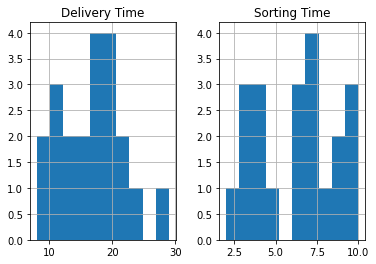

In [5]:
data.hist()

<AxesSubplot:>

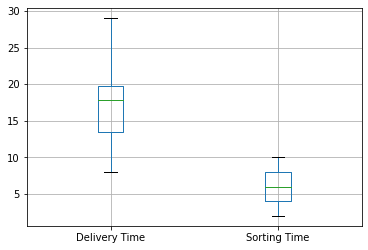

In [6]:
data.boxplot()

C:\Users\rajesh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Delivery Time', ylabel='Density'>

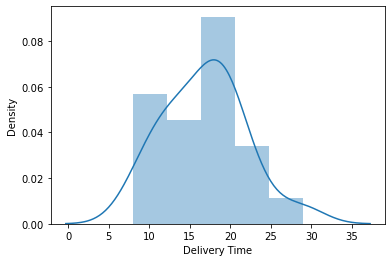

In [7]:
import seaborn as sns
sns.distplot(data['Delivery Time'])

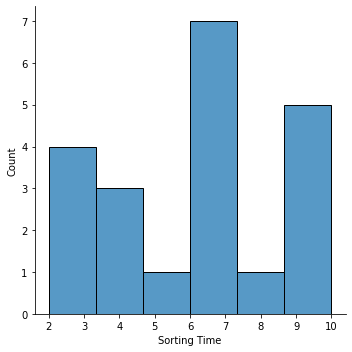

In [8]:
sns.displot(data['Sorting Time'])

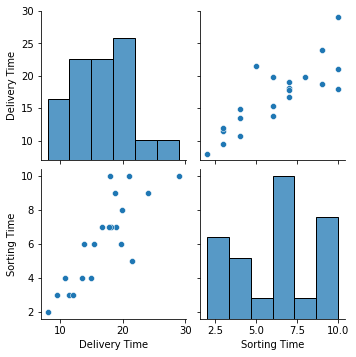

In [9]:
sns.pairplot(data)

In [10]:
#rename the colums with _
data=data.rename({'Delivery Time':'delivery_time','Sorting Time':'sorting_time'},axis=1)
data

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


Text(0, 0.5, 'sorting_time')

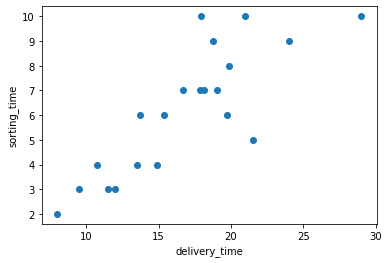

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
x= data.delivery_time
y=data.sorting_time
plt.scatter(x,y)
plt.xlabel("delivery_time")
plt.ylabel("sorting_time")

<AxesSubplot:xlabel='sorting_time', ylabel='delivery_time'>

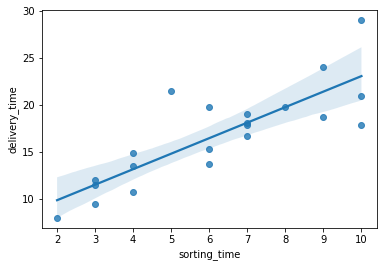

In [12]:
sns.regplot(x=data['sorting_time'],y=data['delivery_time'])

# To build model

In [14]:
import statsmodels.formula.api as smf
model = smf.ols("delivery_time~sorting_time",data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Tue, 22 Feb 2022   Prob (F-statistic):           3.98e-06
Time:                        18:22:40   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
sorting_time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
# here p is less than 0.05 but r-squared less than 0.75 .it is not strong model

# then take log 

In [16]:
import statsmodels.formula.api as smf
data["logsorting_time"]=np.log(data.sorting_time)
model_log1=smf.ols("delivery_time~logsorting_time",data=data).fit()
model_log1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Tue, 22 Feb 2022   Prob (F-statistic):           2.64e-06
Time:                        18:22:48   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           1.1597      2.455      0.472      0.642      -3.978       6.297
logsorting_time     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
# as the above model is less than0.05 and r-squared >0.75


<AxesSubplot:xlabel='logsorting_time', ylabel='delivery_time'>

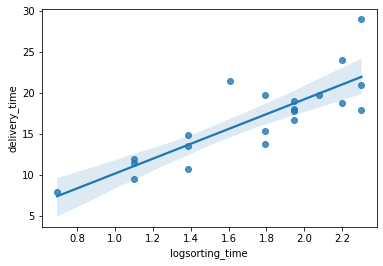

In [18]:
sns.regplot(x="logsorting_time",y="delivery_time",data=data)


In [19]:
model_log1.params

Intercept          1.159684
logsorting_time    9.043413
dtype: float64

#r values
(model_log1.rsquared,model_log1_adj)

# Prediction

In [20]:
new_data=pd.Series([5,8])
new_data

0    5
1    8
dtype: int64

In [21]:
data_pred=pd.DataFrame(new_data,columns=['sorting_time'])
data_pred

,sorting_time
0,5
1,8


In [22]:
model.resid.mean()

-3.891067362495787e-15

In [23]:
model.predict(data_pred)


0    14.827833
1    19.774893
dtype: float64